## D1 Proposal
### Nomenclating Aliens

Team Member 1: Omar Sinan (osinan)<p>
Team Member 2: Swapnendu Sanyal (swapnens)<p>

### Project Description:
We were recently invaded by aliens from various galaxies. We have managed to somehow fight back but now we want to know more about them. However, we do not have their morphology but only have their DNA samples. We plan on differentiating the species, creating bioweapons tailored to each planet, and retaliate and annihilate them.
	The goal of this project is to predict which planet does a particular DNA sequence belong to. We have a multitude of labeled DNA sequences and we want to predict which planet do the invaders belong to.

### Project Idea:
The way that the QuAM works is by providing it with a DNA sequence of a particular size as input and using the classifier described below, the QuAM will predict the planet that the DNA sequence belongs to.
	We will be building a classifier for this problem using the three methods. Namely, we will be using the normal classifier, k-NN, and k-Means and compare the results to pick the best classifier that solves the problem.
	The QuAM will have a simple user interface that allows the user to input the DNA sequence they want to analyze and its size, after running the classifier on the given input, the QuAM will return the prediction of the planet that the DNA sequence belongs to.



### Divided Spec
Swapnendu:<p>
•	Generate the DNA data by writing a python script.<p>
•	Work on one of the classification methods.<p>
Omar:<p>
•	Feature extraction from the given data.<p>
•	Work on the other two classification methods.<p>

### Data Generation
We are going to write a python script that takes the following input:<p>
1.	Length of the sequence<p>
2.	Number of planets<p>
3.	Number of data points<p>
We are going to randomly generate a string of DNA sequence and make it our first cluster. Now, we keep generating clusters that are significantly far from each other for the remaining clusters randomly. Now, we have the clusters, we randomly generate sequences that belong to those clusters. We will output all the DNA sequences with their labels.


## D2 Dataset Generation

### D2.1 Data Collection

We have 5 types of methods to generate data.
How many points of a type in the dataset? 5000
How many clusters of a type in the dataset? 6
How many feature_values in the dataset? 20
How long is a DNA sequence? 20


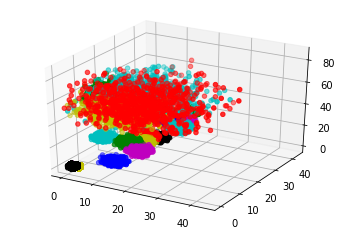

Your csv has been generated.


In [351]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn import preprocessing
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import json

GLOBAL_RANDOM_STATE = 500
random.seed(GLOBAL_RANDOM_STATE)

args = {
    "points": {
        "question": "How many points of a type in the dataset? ",
        "value": None
    },
    "clusters": {
        "question": "How many clusters of a type in the dataset? ",
        "value": None
    },
    "feature_value": {
        "question": "How many feature_values in the dataset? ",
        "value": None
    },
    "length": {
        "question": "How long is a DNA sequence? ",
        "value": None
    }
}


def getInput():
    """
    points -- Number of points to be generated
    clusters -- number of clusters to be generated
    length -- size of the DNA sequence
    feature-value -- Number of different protein-bases possible
                     In humans, it is 4, [A,T,G,C]
    """
    print("We have 5 types of methods to generate data.")
    for k, v in args.items():
        temp = int(input(v["question"]))
        if temp > 0:
            v["value"] = temp
        else:
            print("{} is not a valid input for {}".format(temp, k))
            exit(-1)
    if args["points"]["value"] < 10 * args["clusters"]["value"]:
        print("\nERROR: {} is too large a cluster for {} points.".format(
            args["clusters"]["value"], args["points"]["value"]))
        exit(-1)
    if (args["points"]["value"] >
            args["feature_value"]["value"] ** args["length"]["value"]):
        print(("\nERROR: {} feature_value and DNA of length {} is too small for {}"
               + " points.").format(
            args["feature_value"]["value"], args["length"]["value"],
            args["points"]["value"]))
        exit(-1)

    return {k: v["value"] for k, v in args.items()}


def makeBlobs(data):
    features, targets = make_blobs(n_samples=data["points"],
                                   n_features=data["length"],
                                   centers=data["clusters"],
                                   cluster_std=1.2,
                                   center_box=(0, data["feature_value"]),
                                   shuffle=True,
                                   random_state=GLOBAL_RANDOM_STATE
                                   )
    return (np.abs(np.round(features)).astype(int), targets)


def make_linear_clusters(data):
    features, targets = make_blobs(n_samples=data["points"],
                                   n_features=data["length"],
                                   centers=data["clusters"],
                                   cluster_std=1.2,
                                   center_box=(0, data["feature_value"]),
                                   shuffle=True,
                                   random_state=GLOBAL_RANDOM_STATE
                                   )

    contractFeatures = random.sample(
        list(range(data["length"])),
        random.randint(0, int(0.5*data["length"])))
    for column in range(data["length"]):
        if column in contractFeatures:
            features[:, column] = features[:, column]/(2 + random.random())
    return (np.abs(np.round(features)).astype(int), targets)


def make_noisy_clusters(data):
    small_std = np.arange(0.5, 5, 0.5)
    large_std = np.arange(5, 10, 0.5)
    small_perc = 0.8
    split = int(data["clusters"] * small_perc)
    cluster_std1 = np.random.choice(small_std, split)
    cluster_std2 = np.random.choice(large_std, data["clusters"] - split)
    cluster_std = np.append(cluster_std1, cluster_std2)

    features, targets = make_blobs(n_samples=data["points"],
                                   n_features=data["length"],
                                   centers=data["clusters"],
                                   cluster_std=cluster_std,
                                   center_box=(0, data["feature_value"]),
                                   random_state=GLOBAL_RANDOM_STATE)

    return (np.abs(np.round(features)).astype(int), targets)


def make_moon_clusters(data):
    noise = np.random.choice(np.arange(0.05, 0.1, 0.01), 1)
    features, targets = make_moons(n_samples=data["points"],
                                   noise=noise,
                                   random_state=GLOBAL_RANDOM_STATE)

    new_features = features + abs(np.min(features))
    zeros = np.random.randint(
        -2,2,(data["points"], data["length"] - 2), dtype=int)
    new_features = np.append(new_features, zeros, axis=1)
    return (np.abs(np.round(new_features)).astype(int), targets)


def make_circle_clusters(data):
    noise = np.random.choice(np.arange(0.05, 0.1, 0.01), 1)
    factor = np.random.choice(np.arange(0.1, 0.7, 0.05), 1)
    features, targets = make_circles(n_samples=data["points"],
                                     noise=noise,
                                     factor=factor,
                                     random_state=GLOBAL_RANDOM_STATE)

    new_features = features + abs(np.min(features))
    zeros = np.random.randint(
        -2,2,(data["points"], data["length"] - 2), dtype=int)
    new_features = np.append(new_features, zeros, axis=1)
    return (np.abs(np.round(new_features)).astype(int), targets)

def create(filename="test.csv"):
    data = getInput()
    json.dumps(data,indent=8)
    centerOffset = data["feature_value"]+1

    featureBlob, targetBlob = makeBlobs(data)

    featureLinear, targetLinear = make_linear_clusters(data)
    push_choice = random.randint(0,featureLinear.shape[1]-1)
    print(push_choice)
    featureLinear[:,choice] +=  centerOffset
    targetLinear = targetLinear + np.max(targetBlob) + 1

    featureNoisy, targetNoisy = make_noisy_clusters(data)
    push_choice = random.randint(0,featureLinear.shape[1]-1)
    print(push_choice)
    featureNoisy[:,random.randint(0,featureNoisy.shape[1]-1)] +=  2*centerOffset
    targetNoisy = targetNoisy + np.max(targetLinear) + 1

    featureMoon, targetMoon = make_moon_clusters(data)
    featureMoon[:,random.randint(0,featureMoon.shape[1]-1)] +=  4*centerOffset
    targetMoon = targetMoon + np.max(targetNoisy) + 1

    featureCircle, targetCircle = make_circle_clusters(data)
    featureCircle[:,random.randint(0,featureCircle.shape[1]-1)] += 5*centerOffset
    targetCircle = targetCircle + np.max(targetMoon) + 1

    features = np.concatenate(
        (featureBlob, featureLinear, featureNoisy,featureMoon,featureCircle))
    target = np.concatenate(
        (targetBlob, targetLinear, targetNoisy,targetMoon,targetCircle))



    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    colorMap = "bgrcmyk"*np.max(target)
    for i in range(np.max(target)):
        feature = features[target == i]
        ax.scatter(feature[:, 0], feature[:, 1],feature[:, 2], color=colorMap[i])
    plt.show()


    df = pd.DataFrame(features, columns=["x{}".format(i) for i in range(data["length"])])
    df_nan = df.mask(np.random.random(df.shape) < .05)
    df_nan["target"] = target
    df_nan.to_csv(filename,index=False)

create("finalDataSet.csv")
# create()
print("Your csv has been generated.")

### D2.2: Data Analysis

In [352]:
import pandas as pd 
# data = pd.read_csv("test.csv")
data = pd.read_csv("finalDataSet.csv")

In [353]:
data

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x11,x12,x13,x14,x15,x16,x17,x18,x19,target
0,19.0,10.0,14.0,4.0,14.0,20.0,5.0,0.0,NaN,17.0,...,10.0,2.0,17.0,17.0,16.0,13.0,5.0,8.0,15.0,4
1,14.0,2.0,13.0,10.0,1.0,9.0,8.0,7.0,NaN,9.0,...,10.0,5.0,8.0,10.0,19.0,9.0,4.0,20.0,8.0,0
2,13.0,19.0,20.0,15.0,0.0,16.0,12.0,14.0,6.0,NaN,...,6.0,8.0,14.0,2.0,1.0,20.0,12.0,17.0,18.0,2
3,13.0,19.0,14.0,16.0,6.0,20.0,17.0,20.0,4.0,12.0,...,8.0,8.0,18.0,14.0,NaN,13.0,0.0,9.0,5.0,5
4,12.0,18.0,NaN,13.0,3.0,15.0,12.0,15.0,NaN,16.0,...,6.0,9.0,NaN,4.0,0.0,19.0,14.0,NaN,17.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,NaN,2.0,1.0,1.0,1.0,2.0,2.0,0.0,1.0,1.0,...,1.0,1.0,1.0,107.0,0.0,0.0,2.0,NaN,1.0,21
24996,1.0,1.0,2.0,0.0,2.0,1.0,2.0,1.0,0.0,NaN,...,1.0,2.0,2.0,107.0,2.0,1.0,1.0,0.0,0.0,21
24997,2.0,2.0,NaN,0.0,1.0,NaN,0.0,1.0,2.0,1.0,...,1.0,1.0,NaN,106.0,1.0,1.0,0.0,1.0,2.0,20
24998,1.0,1.0,2.0,1.0,0.0,1.0,2.0,2.0,1.0,0.0,...,1.0,1.0,1.0,107.0,0.0,0.0,2.0,2.0,0.0,21


In [354]:
data.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x11,x12,x13,x14,x15,x16,x17,x18,x19,target
count,23799.000000,23740.000000,23731.000000,23796.000000,23732.000000,23690.000000,23777.000000,23774.000000,23781.000000,23758.000000,...,23748.000000,23728.000000,23717.000000,23746.000000,23760.000000,23801.000000,23699.000000,23704.000000,23733.000000,25000.000000
mean,7.622463,12.379023,18.154861,5.940704,5.936036,9.761123,6.513900,7.681501,3.707035,9.064021,...,6.097229,4.622471,7.884766,26.833067,4.522222,6.662577,4.697751,6.809020,7.627354,12.899520
std,6.625957,12.686072,20.975194,5.652132,6.729033,8.307742,5.983215,7.343334,4.555452,7.590299,...,5.474636,5.367280,7.123877,40.124048,5.806895,6.950053,4.625771,6.700311,6.867330,6.759909
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000
50%,5.000000,10.000000,14.000000,4.000000,2.000000,10.000000,5.000000,5.000000,2.000000,9.000000,...,5.000000,2.000000,7.000000,8.000000,2.000000,3.000000,3.000000,5.000000,6.000000,14.000000
75%,13.000000,19.000000,19.000000,10.000000,12.000000,18.000000,11.000000,15.000000,5.000000,16.000000,...,10.000000,7.000000,14.000000,20.000000,7.000000,11.000000,7.000000,13.000000,14.000000,19.000000
max,44.000000,43.000000,85.000000,34.000000,38.000000,48.000000,39.000000,38.000000,32.000000,48.000000,...,44.000000,33.000000,48.000000,107.000000,40.000000,42.000000,34.000000,38.000000,44.000000,21.000000


In [355]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      23799 non-null  float64
 1   x1      23740 non-null  float64
 2   x2      23731 non-null  float64
 3   x3      23796 non-null  float64
 4   x4      23732 non-null  float64
 5   x5      23690 non-null  float64
 6   x6      23777 non-null  float64
 7   x7      23774 non-null  float64
 8   x8      23781 non-null  float64
 9   x9      23758 non-null  float64
 10  x10     23808 non-null  float64
 11  x11     23748 non-null  float64
 12  x12     23728 non-null  float64
 13  x13     23717 non-null  float64
 14  x14     23746 non-null  float64
 15  x15     23760 non-null  float64
 16  x16     23801 non-null  float64
 17  x17     23699 non-null  float64
 18  x18     23704 non-null  float64
 19  x19     23733 non-null  float64
 20  target  25000 non-null  int64  
dtypes: float64(20), int64(1)
memory usa

Although we see that the values are floating point numbers and integers, we know that this data represents DNA sequences where each feature is a protein base. Hence, all the values should be treated as categorical data.

In [356]:
features, target = (data.iloc[:,:-1],data.iloc[:,-1])
clusters = np.unique(target)
print("There are {} clusters in the dataset which are:\n{}".format(len(clusters),clusters))
print("\nThe features are of dimension {} * {}.".format(features.shape[0],features.shape[1]))
print("\n\nThe features can be described as follows:")
features.describe()

There are 22 clusters in the dataset which are:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]

The features are of dimension 25000 * 20.


The features can be described as follows:


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19
count,23799.000000,23740.000000,23731.000000,23796.000000,23732.000000,23690.000000,23777.000000,23774.000000,23781.000000,23758.000000,23808.000000,23748.000000,23728.000000,23717.000000,23746.000000,23760.000000,23801.000000,23699.000000,23704.000000,23733.000000
mean,7.622463,12.379023,18.154861,5.940704,5.936036,9.761123,6.513900,7.681501,3.707035,9.064021,25.236769,6.097229,4.622471,7.884766,26.833067,4.522222,6.662577,4.697751,6.809020,7.627354
std,6.625957,12.686072,20.975194,5.652132,6.729033,8.307742,5.983215,7.343334,4.555452,7.590299,30.545854,5.474636,5.367280,7.123877,40.124048,5.806895,6.950053,4.625771,6.700311,6.867330
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,5.000000,10.000000,14.000000,4.000000,2.000000,10.000000,5.000000,5.000000,2.000000,9.000000,15.000000,5.000000,2.000000,7.000000,8.000000,2.000000,3.000000,3.000000,5.000000,6.000000
75%,13.000000,19.000000,19.000000,10.000000,12.000000,18.000000,11.000000,15.000000,5.000000,16.000000,19.000000,10.000000,7.000000,14.000000,20.000000,7.000000,11.000000,7.000000,13.000000,14.000000
max,44.000000,43.000000,85.000000,34.000000,38.000000,48.000000,39.000000,38.000000,32.000000,48.000000,86.000000,44.000000,33.000000,48.000000,107.000000,40.000000,42.000000,34.000000,38.000000,44.000000


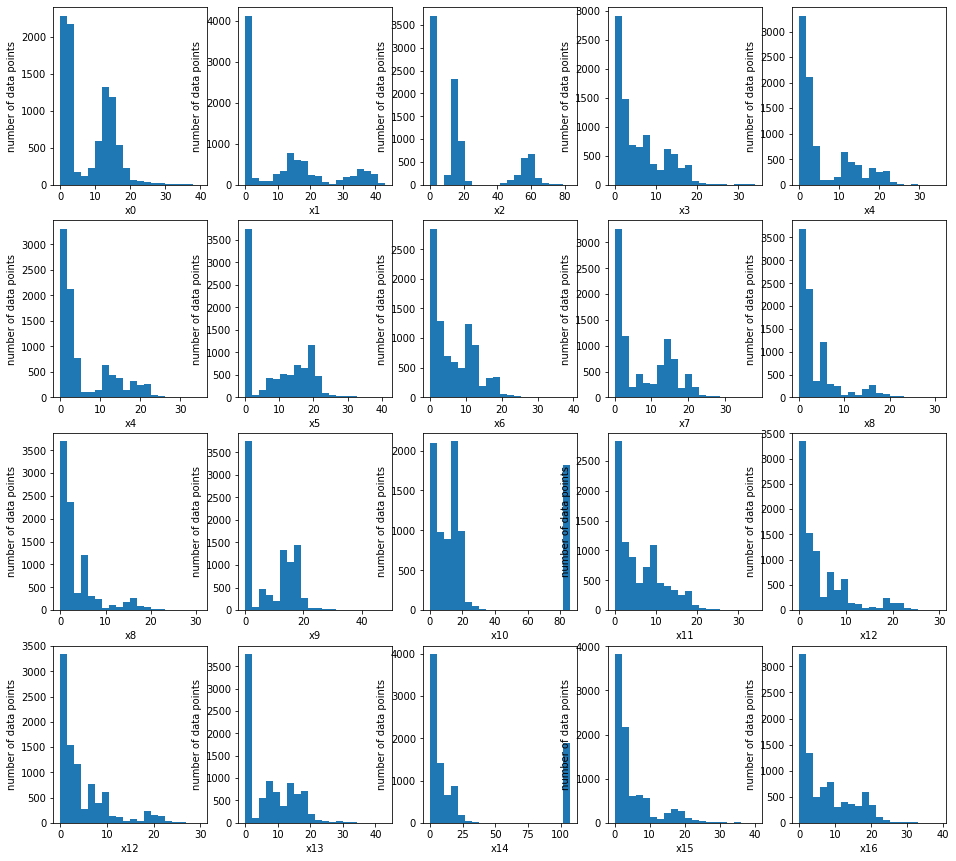

In [357]:
import math
rows = int(math.sqrt(features.shape[1]))
cols = features.shape[1] // rows
figure, subplots = plt.subplots(rows,cols, figsize=(16,15))
for i in range(rows):
    for j in range(cols):
        subplots[i,j].set_xlabel(data.columns[rows*i+j])
        subplots[i,j].set_ylabel("number of data points")
        subplots[i,j].hist(features.dropna().iloc[:,rows*i+j].transpose(),bins=20)

We notice no definite shape (eg. Gaussian) in the feature distribution. However, one can easily observe that the plots are almost identical in shape.

In [358]:
print(f"There are {np.sum(np.sum(np.isnan(features)))} nan values in total.")
for featureName in features.columns:
    print(f"Feature '{featureName}' has {np.sum(np.isnan(features.loc[:,featureName]))} nan values.")

There are 24978 nan values in total.
Feature 'x0' has 1201 nan values.
Feature 'x1' has 1260 nan values.
Feature 'x2' has 1269 nan values.
Feature 'x3' has 1204 nan values.
Feature 'x4' has 1268 nan values.
Feature 'x5' has 1310 nan values.
Feature 'x6' has 1223 nan values.
Feature 'x7' has 1226 nan values.
Feature 'x8' has 1219 nan values.
Feature 'x9' has 1242 nan values.
Feature 'x10' has 1192 nan values.
Feature 'x11' has 1252 nan values.
Feature 'x12' has 1272 nan values.
Feature 'x13' has 1283 nan values.
Feature 'x14' has 1254 nan values.
Feature 'x15' has 1240 nan values.
Feature 'x16' has 1199 nan values.
Feature 'x17' has 1301 nan values.
Feature 'x18' has 1296 nan values.
Feature 'x19' has 1267 nan values.


In [ ]:
import itertools
feature_pairings = list(itertools.combinations(features.columns,3))
cols = 3
rows = math.ceil(len(feature_pairings)/cols)
figure, subplots = plt.subplots(
    rows, cols, figsize=(10*cols, 10*rows),subplot_kw = {"projection" : "3d"})

colors = ['r','g', 'b', 'yellow', 'cyan', 'black', 'gray', 'magenta']*len(np.unique(target))
markers = ['o', '>', 's', 'x', 'P', 'd', '_', 'p', '1', '*']*len(np.unique(target))

print("{} plots to be generated with {} points.".format(len(feature_pairings),len(target)))

for i in range(rows):
    for j in range(cols):
        if feature_pairings:
            feature1, feature2,feature3  = feature_pairings.pop()       
            subplots[i,j].set_xlabel(feature1)
            subplots[i,j].set_ylabel(feature2)
            subplots[i,j].set_ylabel(feature3)
            for t in set(target):
                subplots[i,j].scatter(features.loc[target == t,feature1],
                                    features.loc[target == t,feature2],
                                    features.loc[target == t,feature3],
                                    marker = markers[t],
                                    edgecolors = colors[t],
                                    linewidths=0.55, s=10, label='target = {}'.format(t))
                subplots[i,j].set_title(f"{feature1} vs {feature2} vs {feature3}")
            subplots[i,j].legend(prop={"size":6})
        else:
            subplots[i,j].axis("off")
    


1140 plots to be generated with 25000 points.


From the plots, we can clearly see that there is no linear correlation abong the features. This observation is consistent with our idea of data generation that we used.

### D2.3: Data Wrangling

In [ ]:
import numpy as np
total_nan = np.sum(np.sum(features.isnull()))
print('Total non-numeric entries: {}'.format(total_nan))

In [ ]:
drop_threshold = 0.3
# m = np.sum(np.sum(features.isnull()))
# n = features.shape[0] * features.shape[1]

# Drop rows with too many missing entries
r = data.shape[1] - 1
df = data.dropna(axis=0, thresh=data.shape[1] - (r * drop_threshold))

# Drop columns with too many missing entries
c = len(features)
df = df.dropna(axis=1, thresh=len(data) - (c * drop_threshold))

In [ ]:
total_nan = np.sum(np.sum(df.isnull()))
print('Total non-numeric entries: {}'.format(total_nan))
df

In [ ]:
df = df.apply(lambda x: x.fillna(int(x.mode()))).astype(int)
df

In [ ]:
total_nan = np.sum(np.sum(df.isnull()))
print('Total non-numeric entries: {}'.format(total_nan))

### D2.4: Feature Engineering

In [ ]:
#Getting dummy features
features,target = (df.iloc[:,:-1],df.iloc[:,-1])
features_new = pd.get_dummies(features,prefix=features.columns,columns = features.columns)
features

Clearly, we can see that we cannot use polynomial features due to explosion in the number of features. Intuitively, we also feel that polynomial features would not increase accuracy in a binary dataset as the values will remain 0 or 1. The only advantage that we may get is that the features of higher degree would be sparser.

In [ ]:
from sklearn.decomposition import PCA 

for components in [(int(features_new.shape[1]*perc/100)) for perc in range(5,100,5)]:
    pca_features = PCA(components)
    features_transformed = pca_features.fit(features_new)
    print("{} compnents is able to explain {:.2f}% of the variance.".format(
        pca_features.components_.shape[0],100*pca_features.explained_variance_ratio_.sum()))

We choose 180 component as it effectivele differentiates 90.08% of our data. This leads to a huge reduction in the number of features.

In [ ]:
components = 180
pca_df = PCA(components)
df_transformed = pd.DataFrame(
    pca_df.fit_transform(features_new),columns=[f"new_x{i}" for i in range(components)])
print("{} compnents is able to explain {:.2f}% of the variance.".format(
            pca_df.components_.shape[0],100*pca_df.explained_variance_ratio_.sum()))

In [ ]:
print(df_transformed.shape,target.shape)
df = pd.concat([df_transformed,target],axis=1,join="inner")
df

In [ ]:
df_transformed.describe()

In [ ]:
df.shape

In [ ]:
df_total = pd.concat([df_transformed,pd.DataFrame({"target":taget.values})],axis=1)
df_total.describe()

In [ ]:
df_total

In [ ]:
df_total.shape

In [ ]:
df_total.info()

In [ ]:
df_total

In [ ]:
df = df_total.dropna(axis=0, thresh=1)

In [ ]:
df_total.to_csv("finalData_cleaned.csv",index=False)